## Carson's Spotify Data
## From 2021-06-26 through 2022-01-29

Some quick predictions:

- Top Artist: Kanye West
- Second or thrid place: Mac Miller or Joji
- Most popular genre (determined by api): Pop
- **Note: This data is not album specific! Thus, aritsts with more songs may be favored over smaller artists**

First, loading the data is simple:

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load JSON file into pandas DataFrame
streams_df = pd.read_json("carson_StreamingHistory.json")   
# print(streams_df)   # test

### Exploring the Data:
Using the Pandas dataframe, we can look at the "trackName" column to find how often an artist was played. The higher the value, the more streams this artist had on my spotify!

In [33]:
# We can use .value_counts() on a given column to see how many times an artist or song has occured
# To find the top 15 songs, we use .value_counts().head(15) using the "trackName" column

print(streams_df["trackName"].value_counts().head(15))

Good Life                        38
Runaway                          33
SMILE                            31
Ni**as In Paris                  31
Tongue Tied                      28
Kids                             28
All Falls Down                   27
Peach                            27
Heartless                        27
Waves                            27
The Count (feat. Wiz Khalifa)    26
The Spins                        26
Kilby Girl                       26
I Wonder                         25
Work Out                         25
Name: trackName, dtype: int64


#### We can also do this with the "artistName" column!

In [34]:
print(streams_df["artistName"].value_counts().head(15))

Kanye West           483
Mac Miller           473
Joji                 212
JAY-Z                149
J. Cole               96
Kid Cudi              95
Cage The Elephant     77
The Weeknd            74
Drake                 70
Aminé                 67
Dominic Fike          60
Rihanna               56
Katy Perry            53
Maroon 5              48
B.o.B                 48
Name: artistName, dtype: int64


## Data Observations

My Top songs include:
- Good Life, by Kanye West
- Runaway, by Kanye West

These two songs, interestingly enough, are both sang by Kanye West, also who I predicted to be my top artist. And, after looking at the "artistName" column, you can see that Kanye West in in fact my top artist, barely passing Mac Miller. This is something I thought would happen, as i think over the summer and into this current school year, I went through a "Kanye" phase where alot of the msuic that I listened to was made by Kanye.

## Stats
* Here are various stats regarding my data!

In [35]:
##########################################

# First let's import the data
json_df = pd.read_csv("carson_StreamingHistory.csv")

# Now to compute stats!

# Average Listen Time Per Song
song_arr = json_df["msPlayed"]
song_count = 0
length_total = 0
for lengths in song_arr:
    song_count += 1
    length_total += lengths
avg_listen_time_ms = length_total / song_count
print("Average Listen Time Per Song (in minutes):", avg_listen_time_ms)
avg_listen_time_minutes = avg_listen_time_ms / 60000 #since there are 60,000 milliseconds in a minute!
print("Average Listen Time Per Song (in minutes):", avg_listen_time_minutes)

# Longest Song
longest_song_ms = json_df["msPlayed"].max()
longest_song_data = json_df.loc[json_df["msPlayed"] == longest_song_ms]
print("Longest Song Listen Time Data:", longest_song_data)
# I know this song isnt actually the longest, as a I know this is only 5 minute song, and
# there are other songs nearing 9 minutes. I think it tracked this song for longer than 9 minutes due to 
# it possibly being replayed mid-song (AKA I replayed the song before it actually ended).

# Shortest Song
shortest_song_ms = json_df["msPlayed"].min()
shortest_song_data = json_df.loc[json_df["msPlayed"] == shortest_song_ms]
print("Shortest Song Listen Time Data:", shortest_song_data)
# the reason why there are so many of these is due to the fact of me skipping over a number of songs at once
# for example, I would listen to a "spotify radio" for so long it would turn to songs I didnt know, so I would imediately skip them.

# Average Letters Per Song Title
track_arr = json_df["trackName"]
title_count = 0
total_letters = 0
for titles in track_arr:
    title_count += 1
    for letters in titles:
        total_letters += 1
avg_letters_per_title = total_letters / title_count
print("Average Letters Per Song Title:", avg_letters_per_title)

# Average Letters per Artist Name
artist_arr = json_df["artistName"]
artist_count = 0
total_letters = 0
for artist in artist_arr:
    artist_count += 1
    for letters in artist:
        total_letters += 1
avg_letters_per_artist = total_letters / title_count
print("Average Letters Per Artist Name:", avg_letters_per_artist)

# Top Artists
top_15_artists = artist_arr.value_counts().head(15)
print("My Top 15 Spotify Artists Based Off Songs Listened To:")
print(top_15_artists)

Average Listen Time Per Song (in minutes): 183465.76430824696
Average Listen Time Per Song (in minutes): 3.0577627384707826
Longest Song Listen Time Data:      endTime  artistName  trackName  msPlayed
997       26  Mac Miller  Good News    666030
Shortest Song Listen Time Data:       endTime               artistName  \
697         4            Freddie Gibbs   
909        26             Shania Twain   
941        26             Alan Jackson   
950        26             Randy Travis   
951        26  John Michael Montgomery   
955        26            Brooks & Dunn   
956        26           Jo Dee Messina   
1015       27                 SG Lewis   
1027       27        Empire of the Sun   
1042       27             Fall Out Boy   
1121       27                Grouplove   
1143       27                Lil Nas X   
1156       27                   DaBaby   
1159       27                   Future   
1172       27                  J. Cole   
1206       27                   DaBaby   
4393   

In [36]:
## read the data into a Dataframe
streams_df1 = pd.read_csv("carson_StreamingHistory.csv")   # loaded in Jaylene's data

## change the date to per day
## use the classifier from last DA to change these dates to numeric?
        # pretty sure already wrote code similar to this
streams_df1[ "WK" ] = pd.to_datetime(streams_df1["endTime"]).dt.isocalendar().week     #  reference: https://techtrekking.com/how-to-convert-daily-time-series-data-into-weekly-and-monthly-using-pandas-and-python/
# print("***", streams_df1, "***")              # test
# streams_df1["endTime"] = streams_df1["WK"]
# streams_df1.drop(["WK"], axis=1)
# # print(streams_df1)              # test
# # streams_df1.to_csv("YAY_Carson.csv", index= False)
# streams_df1.drop("WK", inplace=True, axis=1)
sorted_streams = streams_df1.sort_values(by='endTime', ascending=True)
# print("***", sorted_streams)
# # streams_df1.sort("endTime")	# test
# # sorted_streams.to_csv("YAY_Jaylene.csv", index= False)
# sorted_streams.to_csv("Updated_YAY_merged.csv", index= False)
df = pd.read_csv("carson_StreamingHistory.csv")
sorted_df = df.sort_values(by="endTime", ascending=True)
# print(sorted_df)
sorted_df.to_csv("carson_StreamingHistory.csv", index=False)
# streams_df1.drop("endTime", inplace=True, axis=1)
# streams_df1.to_csv("YAY_Carson.csv", index= False)
## CODE REFERENCE
## link: https://www.geeksforgeeks.org/extract-week-number-from-date-in-pandas-python/
## another link: https://www.geeksforgeeks.org/convert-json-to-csv-in-python/

# importing pandas as pd
# import pandas as pd 
  
# # creating a dictionary containing a date
dict = streams_df1["endTime"]
  
# # converting the dictionary to a dataframe
df = pd.DataFrame.from_dict(dict)
  
# # converting the date to the required format
df['endTime'] = pd.to_datetime(df['endTime'], errors ='coerce')
df.astype('int64').dtypes
  
# # extracting the week from the date
weekNumber = df['endTime'].dt.week
# print(weekNumber)
  
# print(weekNumber)
# df["endTime"] = weekNumber
# print(df["endTime"])

# streams_df2 = streams_df1.to_csv("StreamingHistory_updated.csv", index = False)
# ## CODE REFERENCE


C:\Users\carso\AppData\Local\Temp/ipykernel_21040/1981190179.py:40: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df.astype('int64').dtypes
C:\Users\carso\AppData\Local\Temp/ipykernel_21040/1981190179.py:43: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekNumber = df['endTime'].dt.week


## Cleaning:
* Some of the things we changed:
1. converted the data in column endTime from YYYY-MM-DD format into numbers by week.
1. preformed a groupby on the data that would calculate the percent of pop in each week
    - the percents were then put in a list for analysis in the first hypothesis testing problem
1. converted the units from msPlayed, which are millseconds, into minutes&seconds into a seperate dataframe
    - this helped us with the second hypothesis testing and kNN classifier
1. Rewrote all of the files from JSON to CSV format
    - also merged Carson and Jaylene's individual data into one master file titled: merged_StreamingHistory.csv

## Visualizations:
I have chosen to create a bar graph of my 15 top artists: how many times I have listened to the artist and the number of times my most listened song of theirs was played.

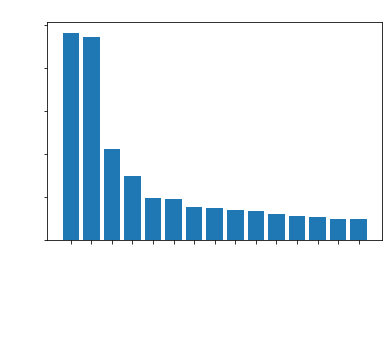

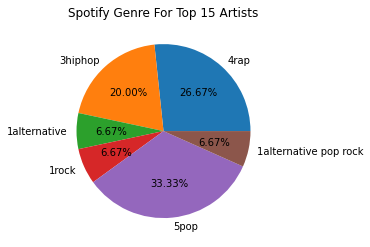

In [37]:
# Creating the Graphs:

# creating a series for the top 5 artist:
# data inputed in increasing order:
num_of_streams = np.array([483, 487, 212, 149, 96, 95, 77, 74, 70, 67, 60, 56, 53, 48, 48])   # total artist streams (all albums, all songs)
# Jaylene stats: 
# [4, 3, 1, 3, 1, 1, 2]
# ["pop", "alternative", "electro pop", "dance pop", "country", "indie", "rap pop"]
# Carson stats:
# [4, 3, 1, 1, 5, 1]
# ["4rap", "3hiphop", "1alternative", "1rock", "5pop", "1alternative pop rock"]
# Merged Data Stats:
# ["pop", "alternative", "electro pop", "dance pop", "country" "indie", "rap pop", "rap", "hip hop", "rock" "alternative pop rock"]
# [9, 4, 1, 3, 1, 1, 2, 4, 3, 1, 1]

num_of_genre = np.array([4, 3, 1, 1, 5, 1])
genre_for_artist = np.array(["4rap", "3hiphop", "1alternative", "1rock", "5pop", "1alternative pop rock"])
artist_for_streams = ["Kanye West:Rap", "Mac Miller:Hip-Hop", "Joji:Alternative", "JAY-Z:Hip-Hop", "J. Cole:Rap", "Kid Cudi:Rap", "Cage The Elephant:Rock", "The Weeknd:Pop", "Drake:Rap", "Aminé:Hiphop", "Dominic Fike:AltPopRock", "Rihanna:Pop", "Katy Perry:Pop", "Maroon 5:Pop", "B.o.B:Pop"] 
artist_ser = pd.Series(num_of_streams, index=artist_for_streams)
# genre_ser = pd.Series(genre_for_artist, index=artist_for_streams)

# Let's visualize some Data!
import matplotlib.pyplot as plt
# Let's start with my top artist and the amount of songs each have

plt.figure()
plt.xlabel("Artists", color="white")
plt.xticks(rotation=55, ha="right", color="white")
plt.yticks(color="white")
plt.ylabel("Total Songs Played", color="white")
plt.title("Top 15 Artists/Songs Listened To", color="white")
# this creates a new current figure, instead of adding to the previou one
plt.bar(top_15_artists.index, top_15_artists)
# plt.savefig("bar_example.png")

def pie_chart(x_ser, y_ser):
    plt.figure() # will create a new "current" figure
    plt.title("Spotify Genre For Top 15 Artists")
    plt.pie(y_ser, labels=x_ser, autopct="%.2f%%")      # pass in only y_ser because that has the acutal counts of the data... use x_ser as the labels, autppct = auto percent... how to automatically display percentages for pie sectors. the %% will display two decimal places i think... either way just keep the formatting of it the same
    # plt.savefig("Genre_Chart.png")

# Bar Graph:
# call bar_chart 
# plt.bar(artist_for_streams, artist_ser, "Spotify Streaming Data: Most Popular Artist", "Most_Popular_Artist.png")     # calling graph for total of all streams from an artist(spanning multiple albums)
# Pie Chart:
pie_chart(genre_for_artist, num_of_genre)

## Hypothesis 1:
* I want to test and see if I listen to more Mac Miller songs than I do

### Hypothesis Testing:
Is Carson's streaming history going to have 1/4 or more pop music from the given time frame of 2021-06-26 to 2022-01-29?

- I took top the 15 artists and found their  each of their genres! (Using Gina's spotifty API :) )
- Pop occurs 5 times as the genre of the top artists, making it the most listened to genre
- Note: the pop genre doesn't include any pop spin offs... e.g. no alternative pop, hip-hop pop
- Uses the 5 step hypothsis testing method
- Measured in weeks (32 total)
- The data points are measured in percent. Thus, 25% = 25, 50 = 50%, etc
- Identify null and alternative hypothesis
- H0: M(pop) $\le$ 25
- H1: M(pop) $\gt$ 25

Level of significance


2. Level of significance  
$ \alpha = 0.01 $

3. Select test statistic:
test statistic: $$ t = \frac{\overline{x} - \mu }{\frac{s}{\sqrt{n}}} $$

4. Computations:
- is a right-tailed test
- df = 32-1 = 31 (because there are 32 weeks in thed data)
- t-table value = 2.45
- if t-computed > 2.45 then we reject H0. If t-commputed is less than or equal to 2.45, then we cannot reject H0.
- this results in: $$ t = \frac{25.027-25}{\frac{9.118}{\sqrt{32}}} $$ $$ t (computed) = 0.04 $$`
5. Decision:  
At a level of 0.01 significance, we cannot reject H0 since t-computed (0.04) < t-critical (2.45). Thus we cannot say that pop is more likely to be listened to.  

In [38]:
from scipy import stats
import numpy as np
# let's check our work with scipy
pop_percent_by_week = [13.376, 10.807, 28.652, 22.966, 32.538, 25.978, 23.467, 28.849, 35.859, 49.237, 38.684, 32.687, 
					35.485, 28.364, 29.274, 23.894, 30.578, 34.583, 25.485, 24.375, 29.538, 21.394, 23.847, 23.789, 
					20.784, 25.896, 20.283, 12.385, 10.549, 9.693, 14.687, 12.89]
num_of_genre = np.array(pop_percent_by_week)
len_num_of_genre = len(num_of_genre)
print(len_num_of_genre)
std = np.std(num_of_genre, ddof=1)
print("std:", std)
mean = np.mean(num_of_genre)
print("mean:", mean)
t, pval = stats.ttest_1samp(num_of_genre, 25)
pval /= 2 # p-value = the probablity that this sample comes from this distribution
print("t:", t, "pval", pval)
alpha = 0.01
if pval < alpha:
    print("reject H0")
else: 
    print("do not reject H0")

32
std: 9.11833270779037
mean: 25.02728125
t: 0.016924810701645247 pval 0.4933025309501572
do not reject H0


### Conclusion:

After viewing the data, I am not suprised that most of my streaming history is not related back to pop, less than 25% to be more precise. I originally thought that pop would not come out on top, and something like rap would, and ultimately I was correct. After calculating our t(computed), we can confidently say that I 